###  car price dataset


OBJECTIVE: Build a linear Regression model to predict:Fuel efficiency(mpg) using horsepower

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## 1. Load the Dataset

In [41]:
df = pd.read_csv("mpg.csv")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [53]:
print( df.shape)
print(df.head())

(392, 9)
    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin                       name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


## 2.Data Preparation

In [42]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [43]:

df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

In [44]:
missing_percent = df["horsepower"].isnull().mean() * 100


In [45]:
df = df.dropna(subset=["horsepower", "mpg"])
print("Missing %:", missing_percent)


Missing %: 1.507537688442211


In [46]:
print("After Removing Nulls:", df.shape)

After Removing Nulls: (392, 9)


In [61]:
# IQR Method
Q1 = df["horsepower"].quantile(0.25)
Q3 = df["horsepower"].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df["horsepower"] >= lower) & (df["horsepower"] <= upper)]
print("After Removing Outliers:", df.shape)

After Removing Outliers: (375, 9)


In [62]:
X = df[["horsepower"]]
y = df["mpg"]


## 3. Exploratory Data Analysis (EDA)

In [47]:
df.describe()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


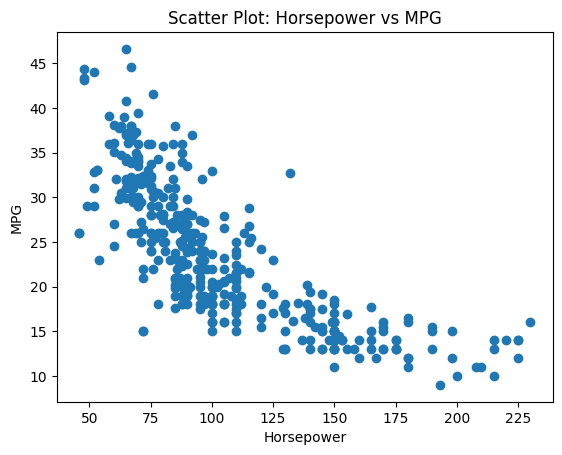

In [57]:
plt.scatter(df["horsepower"], df["mpg"])
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Scatter Plot: Horsepower vs MPG")
plt.show()



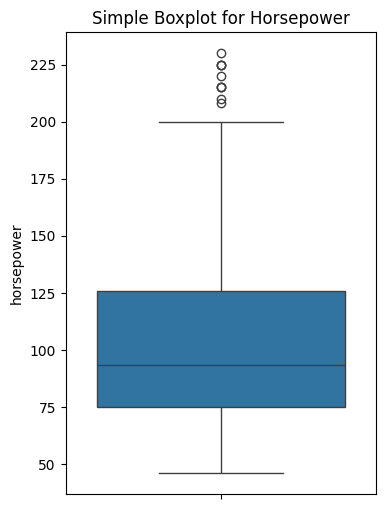

In [58]:
plt.figure(figsize=( 4, 6))
sns.boxplot(y=df["horsepower"])
plt.title("Simple Boxplot for Horsepower")
plt.show()


## 4A. Linear Regression using Scikit-Learn

In [64]:
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print("Sklearn Intercept:", model.intercept_)
print("Sklearn Slope:", model.coef_[0])

Sklearn Intercept: 42.63514964102197
Sklearn Slope: -0.18756532857594543


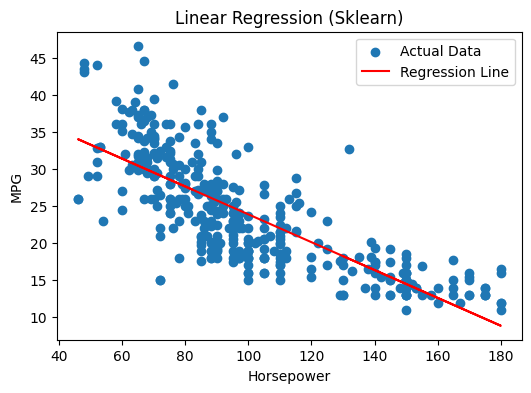

In [65]:
plt.figure(figsize=(6,4))
plt.scatter(X, y, label="Actual Data")
plt.plot(X, y_pred, color="red", label="Regression Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression (Sklearn)")
plt.legend()
plt.show()


## 4B. Linear Regression using Formula 

In [66]:
x = df["horsepower"].values
y_values = df["mpg"].values

x_mean = np.mean(x)
y_mean = np.mean(y_values)

b1 = np.sum((x - x_mean)*(y_values - y_mean)) / np.sum((x - x_mean)**2)
b0 = y_mean - b1 * x_mean

print("Manual Intercept:", b0)
print("Manual Slope:", b1)

y_pred_formula = b0 + b1 * x

Manual Intercept: 42.63514964102197
Manual Slope: -0.18756532857594538


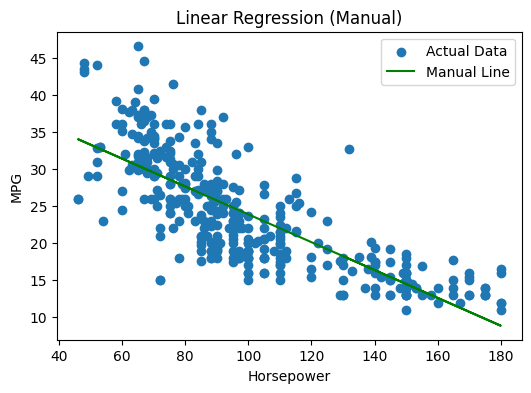

In [67]:
plt.figure(figsize=(6,4))
plt.scatter(x, y_values, label="Actual Data")
plt.plot(x, y_pred_formula, color="green", label="Manual Line")
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("Linear Regression (Manual)")
plt.legend()
plt.show()

In [70]:
print("\nComparison:")
print("Sklearn and Manual methods produce nearly identical slope and intercept.")


Comparison:
Sklearn and Manual methods produce nearly identical slope and intercept.
